 Based on [scikit-learn MOOC](https://github.com/INRIA/scikit-learn-mooc)

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


# Import Toy Dataset from SciKit-Learn

[SciKit-Learn Dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html)

In [ ]:
import sklearn.datasets as datasets

features, target = datasets.fetch_california_housing(return_X_y=True, as_frame=True)
df = pd.concat([features, target], axis=1)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# Exploratory Data Analysis

In [ ]:
print(f"The dataset contains {features.shape[1]} features and {features.shape[0]} samples")
print()
features_names = list(features.columns)
print(f"We have to predict {target.name}, using the following variables:\n{features_names}")
print()
print(f"The features set contains the following data types:\n{features.dtypes}")
print()
print("Check NaN values")
print(df.info())
print()
print("Variables and Target Ranges")
print(f"The target spans between {target.min():.2f} and {target.max():.2f}")
print(f"Description of Avg features")
print(features[['AveRooms', 'AveBedrms', 'AveOccup']].describe())

The dataset contains 8 features and 20640 samples

We have to predict MedHouseVal, using the following variables:
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

The features set contains the following data types:
MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
dtype: object

Check NaN values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float6

# Target Distribution Plot

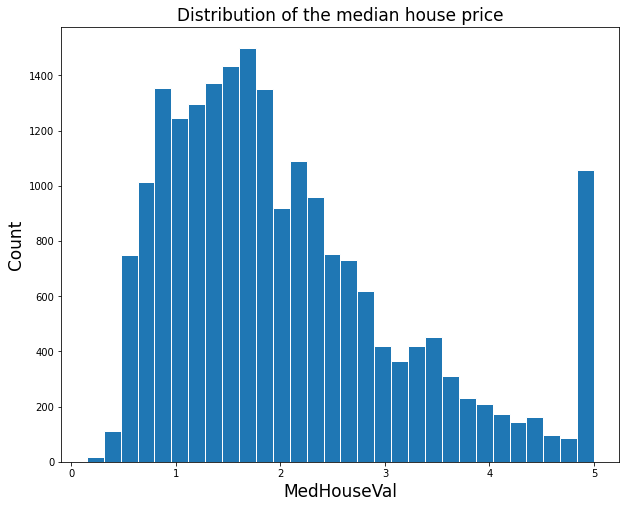

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,8))
target.plot.hist(bins=30, edgecolor="white")
ax.set_xlabel("MedHouseVal", fontsize=17)
ax.set_ylabel("Count", fontsize=17)
ax.set_title("Distribution of the median house price", fontsize=17)
plt.show()

Geographical Plot

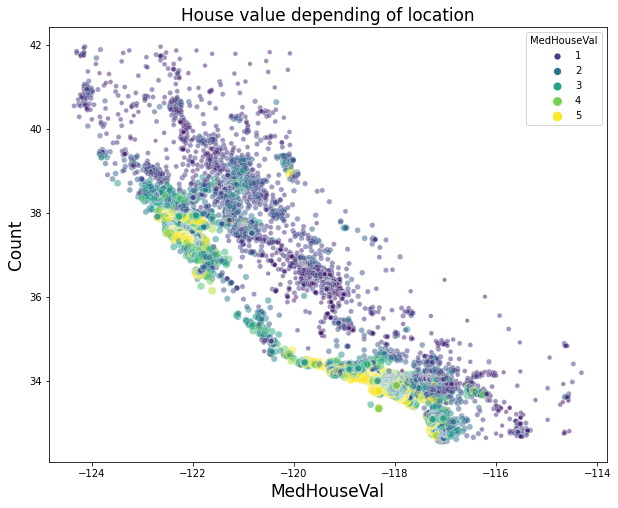

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,8))
sns.scatterplot(data=df, x="Longitude", y="Latitude",
                size="MedHouseVal", hue="MedHouseVal",
                palette="viridis", alpha=0.5)
ax.legend(title="MedHouseVal", loc="upper right")
ax.set_xlabel("MedHouseVal", fontsize=17)
ax.set_ylabel("Count", fontsize=17)
ax.set_title("House value depending of location", fontsize=17)
plt.show()

# Cross Validate

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [ ]:
from sklearn import set_config
set_config(display='diagram')
model = make_pipeline(StandardScaler(), LinearRegression())
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [ ]:
from sklearn.model_selection import cross_validate

cv = cross_validate(model, features, target,
                    cv=5, scoring=('r2', 'neg_mean_squared_error'), 
                    return_estimator=True, return_train_score=True, n_jobs=2)
cv_df = (pd.DataFrame({f'Train_R2':cv['train_r2'], f'Train_MSE':-cv['train_neg_mean_squared_error'],
                       f'Test_R2':cv['test_r2'], f'Test_MSE':-cv['test_neg_mean_squared_error']}, index=[f"Fold {i}" for i in range(1,6)]))   

print("Cross validate")
print(f"Mean Squared Error on training set "
      f"{-cv['train_neg_mean_squared_error'].mean():.3f} +/- "
      f"{cv['train_neg_mean_squared_error'].std():.3f}")
print(f"Mean Squared Error on test set "
      f"{-cv['test_neg_mean_squared_error'].mean():.3f} +/- "
      f"{cv['test_neg_mean_squared_error'].std():.3f}")
print()
print(cv_df)

Cross validate
Mean Squared Error on training set 0.521 +/- 0.019
Mean Squared Error on test set 0.558 +/- 0.066

        Train_R2  Train_MSE   Test_R2  Test_MSE
Fold 1  0.596104   0.545031  0.548663  0.484859
Fold 2  0.633328   0.500920  0.468207  0.622497
Fold 3  0.610980   0.497154  0.550784  0.646210
Fold 4  0.610620   0.527239  0.536987  0.543200
Fold 5  0.584433   0.535534  0.660514  0.494685


# Benchmark Model

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(features,target,test_size=0.3, random_state = 42)

In [ ]:
benchmark_model = model.fit(x_train, y_train)
y_train_hat = benchmark_model.predict(x_train)
y_test_hat = benchmark_model.predict(x_test)

In [ ]:
print(f"MSE on training set: {np.round(mean_squared_error(y_train, y_train_hat),2)}")
print(f"R2 on training set: {np.round(r2_score(y_train, y_train_hat),2)}")
print()
print(f"MSE on test set: {np.round(mean_squared_error(y_test, y_test_hat),2)}")
print(f"R2 on test set: {np.round(r2_score(y_test, y_test_hat),2)}")

MSE on training set: 0.52
R2 on training set: 0.61

MSE on test set: 0.53
R2 on test set: 0.6


In [ ]:
coefs = pd.DataFrame(
        model.named_steps['linearregression'].coef_,
        columns=['Coefficient'], index=features_names
    ).round(3)
coefs = coefs.reset_index()
coefs.columns = ['Feature', 'Coefficient']
coefs = coefs.sort_values(['Coefficient'], ascending=False)
coefs

,Feature,Coefficient
0,MedInc,0.849
3,AveBedrms,0.348
1,HouseAge,0.122
4,Population,-0.001
5,AveOccup,-0.042
2,AveRooms,-0.300
7,Longitude,-0.869
6,Latitude,-0.894


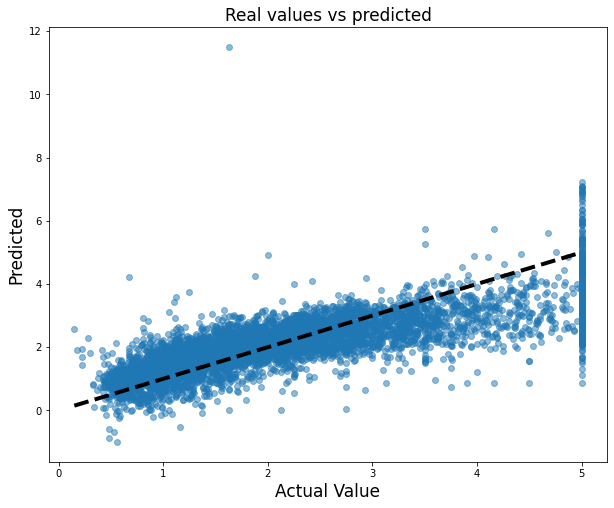

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,8))
ax.scatter(y_test, y_test_hat, alpha=0.5, s=35)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual Value', fontsize=17)
ax.set_ylabel('Predicted', fontsize=17)
ax.set_title("Real values vs predicted", fontsize=17)
plt.show()

# Improve the model!
- Create new features
- Fit Regularization Models, such as Ridge or Lasso Regressions
- Use different splitting techniques, such as Stratified CV